In [2]:
# Import Dependencies
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Connect to SQLite dB
con = sqlite3.connect('/Users/jennadodge/uofo-virt-data-pt-12-2021-u-b/Water_Quality_Analysis/Database/database.sqlite3')

# Create a cursor object
cur = con.cursor()

In [4]:
df = pd.read_sql_query("SELECT * FROM Census_Data INNER JOIN Contaminant_Summary on Census_Data.county_FIPS = Contaminant_Summary.county_FIPS",con)
df.head()

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,8069,"Larimer County, Colorado",Larimer County,0500000US08069,359066,295995,3816,2879,8539,326,...,0.948124,0.375569,0.4428,8069,4,264021,4744,984,1519,1186.00
1,10001,"Kent County, Delaware",Kent County,0500000US10001,181851,107685,46999,1150,4430,126,...,1.305087,0.271086,0.4191,10001,9,70580,4987,201,1395,554.11
2,10003,"New Castle County, Delaware",New Castle County,0500000US10003,570719,314231,146545,2157,35201,176,...,1.464587,0.349206,0.4607,10003,20,555453,15583,68,4732,779.15
3,10005,"Sussex County, Delaware",Sussex County,0500000US10005,237378,175847,25358,1844,3071,113,...,1.161943,0.352475,0.4561,10005,11,205901,5456,91,1295,496.00
4,16019,"Bonneville County, Idaho",Bonneville County,0500000US16019,123964,103736,627,1262,1424,155,...,0.919484,0.401124,0.4287,16019,1,2982,42,42,42,42.00


In [5]:
# Read other tables to view data
cur.execute('SELECT name from sqlite_master where type= "table"')
print(cur.fetchall())

[('FIPS_Codes',), ('Utilities',), ('all_contaminants',), ('Contaminant_Summary',), ('Census_Data',)]


In [6]:
utilities_df = pd.read_sql_query("SELECT * FROM Utilities",con)
all_contaminants_df = pd.read_sql_query("SELECT * FROM all_contaminants",con)
cont_df = pd.read_sql_query("SELECT * FROM Contaminant_Summary",con)
fips_df = pd.read_sql_query("SELECT * FROM FIPS_Codes",con)

In [7]:
con.close()

In [8]:
df.shape

(882, 37)

In [9]:
utilities_df.shape

(10035, 6)

In [10]:
utilities_df.describe()

,Zip,Population_Served
count,10035.000000,1.003500e+04
mean,56859.800199,8.224071e+03
std,26185.705310,6.241452e+04
min,2804.000000,0.000000e+00
25%,35096.000000,1.600000e+02
50%,60113.000000,7.000000e+02
75%,76049.000000,3.124000e+03
max,97910.000000,3.935257e+06


In [11]:
all_contaminants_df.shape

(123658, 11)

In [12]:
all_contaminants_df.describe()

,Zip,People_served,Utility_Measurement,EWG_Health_Guideline,Legal_Limit,Contaminant_Factor
count,123658.000000,1.236580e+05,1.236580e+05,123658.000000,123658.000000,1.236580e+05
mean,57790.288853,1.589676e+04,3.780172e+01,101.012482,199.713793,8.909689e+01
std,25155.566367,8.589174e+04,6.369766e+03,296.515719,911.415469,6.373585e+03
min,2804.000000,0.000000e+00,0.000000e+00,0.000200,0.000000,0.000000e+00
25%,36010.000000,3.220000e+02,4.500000e-01,0.100000,0.000000,2.000000e-01
50%,62015.000000,1.400000e+03,2.000000e+00,0.150000,0.000000,7.200000e+00
75%,75789.000000,6.738000e+03,9.520000e+00,20.000000,10.000000,4.925000e+01
max,97910.000000,3.935257e+06,2.200000e+06,4000.000000,10000.000000,2.200000e+06


In [13]:
cont_df.describe()

,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
count,883.000000,8.830000e+02,8.830000e+02,883.000000
mean,11.364666,9.346382e+04,1.242177e+04,935.845436
std,22.000376,4.279776e+05,7.957312e+04,3059.172343
min,1.000000,2.700000e+01,0.000000e+00,0.000000
25%,4.000000,4.746500e+03,1.969000e+03,365.845000
50%,7.000000,1.554600e+04,4.772000e+03,702.000000
75%,14.000000,4.705700e+04,1.106150e+04,1144.380000
max,546.000000,7.822450e+06,2.215481e+06,88619.240000


In [14]:
cont_df.shape

(883, 7)

<AxesSubplot:>

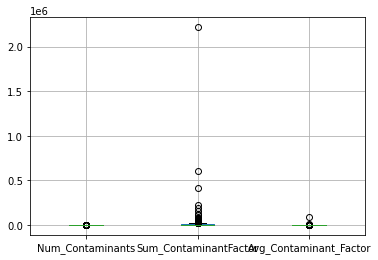

In [15]:
cont_df.boxplot(column=["Num_Contaminants","Sum_ContaminantFactor","Avg_Contaminant_Factor"])

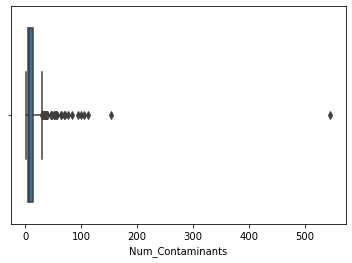

In [16]:
sns.boxplot(x=cont_df['Num_Contaminants'])
plt.show()

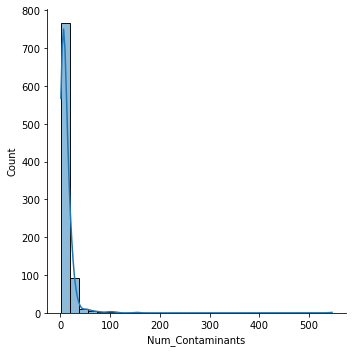

In [17]:
sns.displot(cont_df['Num_Contaminants'],bins=30, kde = True)
plt.show()

In [18]:
cont_df['Num_Contaminants'].describe()

count    883.000000
mean      11.364666
std       22.000376
min        1.000000
25%        4.000000
50%        7.000000
75%       14.000000
max      546.000000
Name: Num_Contaminants, dtype: float64

In [19]:
cont_df['Num_Contaminants'].quantile(0.25)

4.0

In [20]:
cont_df['Num_Contaminants'].quantile(0.75)

14.0

In [21]:
Q1 = cont_df['Num_Contaminants'].quantile(0.25)
Q3 = cont_df['Num_Contaminants'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
IQR

10.0

In [23]:
lower_lim = 0 # b/c Q1-1.5 * IQR iess less than zero
upper_lim = Q3 + 1.5 * IQR

In [24]:
upper_lim

29.0

In [25]:
# how many data points would be dropped if we eliminated outliers
outliers_upper = (cont_df['Num_Contaminants'] > upper_lim)

In [26]:
len(cont_df['Num_Contaminants']) - len(cont_df['Num_Contaminants'][outliers_upper])

845

In [27]:
len(outliers_upper)

883

In [28]:
cont_df['Num_Contaminants'][-(outliers_upper)]

0       4
1       9
2      20
3      11
4       1
       ..
873     1
877     6
878     2
879     1
880     1
Name: Num_Contaminants, Length: 845, dtype: int64

In [29]:
cont_df.shape

(883, 7)

In [30]:
cont_df = cont_df[-(outliers_upper)]

In [31]:
cont_df.shape

(845, 7)

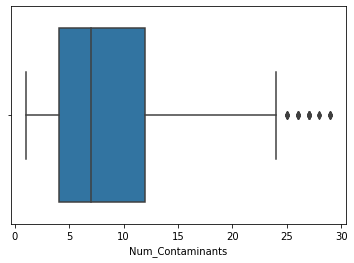

In [32]:
sns.boxplot(x=cont_df['Num_Contaminants'])
plt.show()

In [33]:
cont_df.describe()

,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
count,845.000000,8.450000e+02,8.450000e+02,845.000000
mean,8.822485,5.491773e+04,9.958923e+03,938.271964
std,6.563522,1.903610e+05,7.758093e+04,3125.352432
min,1.000000,2.700000e+01,0.000000e+00,0.000000
25%,4.000000,4.472000e+03,1.851000e+03,352.070000
50%,7.000000,1.406300e+04,4.461000e+03,695.050000
75%,12.000000,4.063800e+04,1.001700e+04,1145.130000
max,29.000000,3.328298e+06,2.215481e+06,88619.240000


In [34]:
cont_df.isna().sum()

County_FIPS               0
Num_Contaminants          0
Sum_Population_Served     0
Sum_ContaminantFactor     0
Min_Contaminant_Factor    0
Max_Contaminant_Factor    0
Avg_Contaminant_Factor    0
dtype: int64

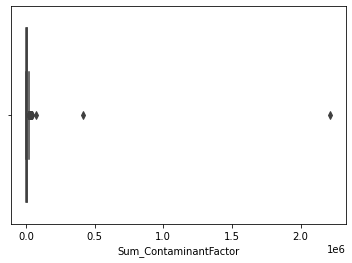

In [35]:
sns.boxplot(x=cont_df['Sum_ContaminantFactor'])
plt.show()

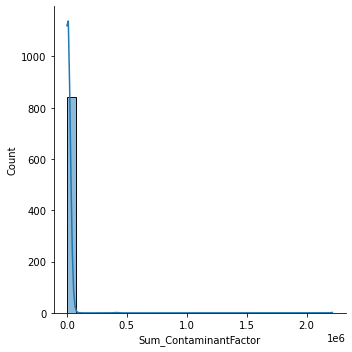

In [36]:
sns.displot(cont_df['Sum_ContaminantFactor'],bins=30, kde = True)
plt.show()

In [37]:
# Same thing for Sum_ContaminantFactor
cont_df['Sum_ContaminantFactor'].describe()

count    8.450000e+02
mean     9.958923e+03
std      7.758093e+04
min      0.000000e+00
25%      1.851000e+03
50%      4.461000e+03
75%      1.001700e+04
max      2.215481e+06
Name: Sum_ContaminantFactor, dtype: float64

In [38]:
Q1 = cont_df['Sum_ContaminantFactor'].quantile(0.25)
Q3 = cont_df['Sum_ContaminantFactor'].quantile(0.75)
IQR = Q3 - Q1

In [39]:
IQR

8166.0

In [40]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

22266.0

In [41]:
# how many data points would be dropped if we eliminated outliers
outliers_upper = (cont_df['Sum_ContaminantFactor'] > upper_lim)
len(cont_df['Sum_ContaminantFactor']) - len(cont_df['Sum_ContaminantFactor'][outliers_upper])

808

In [42]:
cont_df['Sum_ContaminantFactor'][-(outliers_upper)]

0       4744
1       4987
2      15583
3       5456
4         42
       ...  
873      363
877     7277
878     1188
879     1104
880       20
Name: Sum_ContaminantFactor, Length: 808, dtype: int64

In [43]:
cont_df = cont_df[-(outliers_upper)]

In [44]:
cont_df.describe()

,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
count,808.000000,8.080000e+02,808.000000,808.000000
mean,8.396040,4.673438e+04,5873.143564,768.699369
std,6.228335,1.506063e+05,5293.297251,583.164846
min,1.000000,2.700000e+01,0.000000,0.000000
25%,4.000000,4.315250e+03,1778.750000,339.202500
50%,7.000000,1.292450e+04,4097.500000,673.240000
75%,11.250000,3.707325e+04,8931.500000,1079.700000
max,29.000000,3.328298e+06,22227.000000,5376.000000


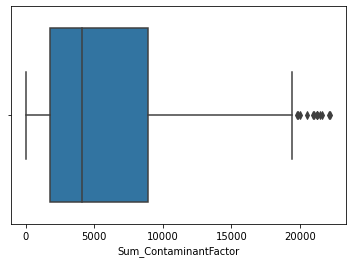

In [45]:
sns.boxplot(x=cont_df['Sum_ContaminantFactor'])
plt.show()

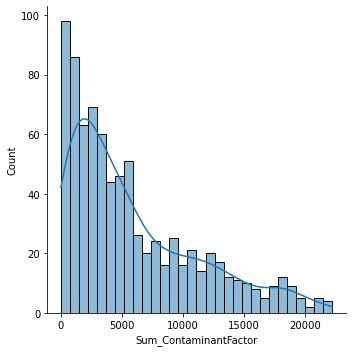

In [46]:
sns.displot(cont_df['Sum_ContaminantFactor'],bins=30, kde = True)
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   county_FIPS             882 non-null    int64  
 1   Geographic_Area_Name    882 non-null    object 
 2   County                  882 non-null    object 
 3   GEOID                   882 non-null    object 
 4   Total_Population        882 non-null    int64  
 5   White                   882 non-null    int64  
 6   Black                   882 non-null    int64  
 7   Native                  882 non-null    int64  
 8   Asian                   882 non-null    int64  
 9   Pacific_Islander        882 non-null    int64  
 10  Other                   882 non-null    int64  
 11  Two_or_more_Races       882 non-null    int64  
 12  Hispanic                882 non-null    int64  
 13  Not_Hispanic            882 non-null    int64  
 14  Not_White               882 non-null    in

In [48]:
df.describe()

,county_FIPS,Total_Population,White,Black,Native,Asian,Pacific_Islander,Other,Two_or_more_Races,Hispanic,...,pct_Two_or_more_Races,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
count,882.000000,8.820000e+02,8.820000e+02,8.820000e+02,882.000000,8.820000e+02,882.000000,8.820000e+02,8.820000e+02,8.820000e+02,...,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,8.820000e+02,8.820000e+02,882.000000
mean,34216.615646,1.395653e+05,8.338217e+04,1.460549e+04,1502.502268,1.062759e+04,282.706349,1.494588e+04,1.422498e+04,2.995920e+04,...,0.061026,0.280229,0.113581,0.753765,0.211073,0.441717,10.758503,8.711697e+04,1.175539e+04,935.660215
std,15322.693185,5.038503e+05,2.057142e+05,7.359074e+04,7127.251881,7.185546e+04,1651.363024,1.124154e+05,7.137211e+04,2.060264e+05,...,0.029338,0.166876,0.108514,0.373162,0.152220,0.033689,12.639396,3.843995e+05,7.711364e+04,3060.903090
min,1001.000000,7.060000e+02,4.010000e+02,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,2.000000e+01,8.000000e+00,...,0.018930,0.063408,0.011866,0.202798,0.036514,0.315700,1.000000,2.700000e+01,0.000000e+00,0.000000
25%,26007.500000,1.247950e+04,1.049000e+04,6.800000e+01,64.000000,4.500000e+01,4.000000,1.002500e+02,5.730000e+02,2.962500e+02,...,0.042034,0.146299,0.040314,0.457942,0.100287,0.417125,4.000000,4.725250e+03,1.966500e+03,365.767500
50%,38034.000000,3.105100e+04,2.630650e+04,5.795000e+02,186.000000,1.620000e+02,12.000000,4.350000e+02,1.603500e+03,1.091500e+03,...,0.054247,0.226679,0.069034,0.669062,0.154340,0.439450,7.000000,1.545300e+04,4.770000e+03,701.010000
75%,47160.500000,8.803400e+04,7.166950e+04,4.448750e+03,719.750000,9.977500e+02,52.000000,2.177500e+03,5.622000e+03,5.601500e+03,...,0.071544,0.384804,0.142876,0.980501,0.272424,0.463475,14.000000,4.685075e+04,1.104950e+04,1144.755000
max,56045.000000,1.001401e+07,3.259427e+06,1.205825e+06,163465.000000,1.499985e+06,24523.000000,2.784181e+06,1.488069e+06,4.804763e+06,...,0.277103,0.768684,0.499984,1.956877,0.693131,0.550900,154.000000,7.822450e+06,2.215481e+06,88619.240000


In [49]:
df.columns

Index(['county_FIPS', 'Geographic_Area_Name', 'County', 'GEOID',
       'Total_Population', 'White', 'Black', 'Native', 'Asian',
       'Pacific_Islander', 'Other', 'Two_or_more_Races', 'Hispanic',
       'Not_Hispanic', 'Not_White', 'pct_White', 'pct_Black', 'pct_Native',
       'pct_Asian', 'pct_Pacific_Islander', 'pct_Other', 'pct_Not_White',
       'pct_Hispanic', 'pct_Not_Hispanic', 'pct_Two_or_more_Races',
       'Simpson_Race_DI', 'Simpson_Ethnic_DI', 'Shannon_Race_DI',
       'Shannon_Ethnic_DI', 'Gini_Index', 'County_FIPS', 'Num_Contaminants',
       'Sum_Population_Served', 'Sum_ContaminantFactor',
       'Min_Contaminant_Factor', 'Max_Contaminant_Factor',
       'Avg_Contaminant_Factor'],
      dtype='object')

In [50]:
# df[['Total_Population','%_White','%_Non-White','%_Hispanic', '%_Not_Hispanic','Simpson_Race_DI','Simpson_Ethnic_DI',
#        'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index']].describe()

<AxesSubplot:>

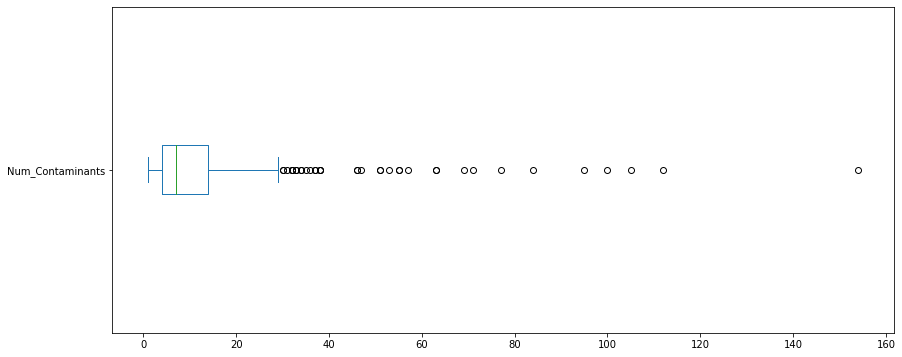

In [51]:
df['Num_Contaminants'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

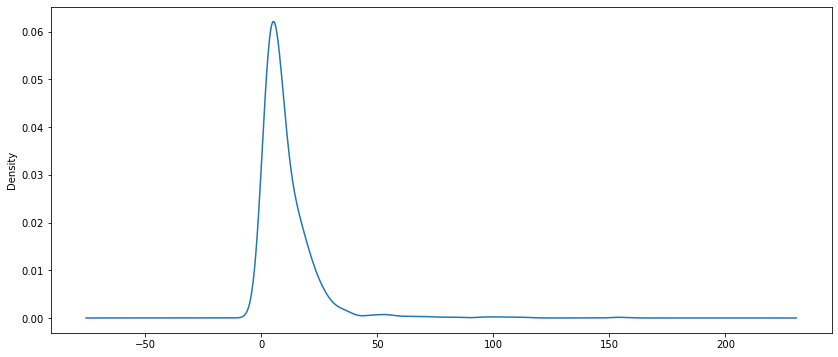

In [52]:
df['Num_Contaminants'].plot(kind="density", figsize=(14,6))

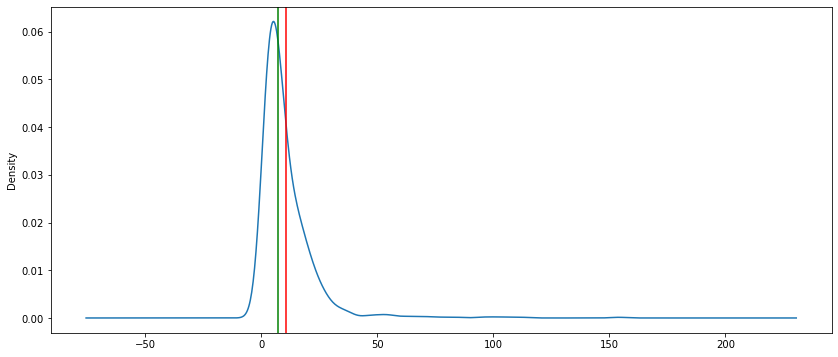

In [53]:
ax = df['Num_Contaminants'].plot(kind="density", figsize=(14,6))
ax.axvline(df['Num_Contaminants'].mean(), color='red')
ax.axvline(df['Num_Contaminants'].median(), color='green')

Text(0.5, 0, 'Number of Contaminants')

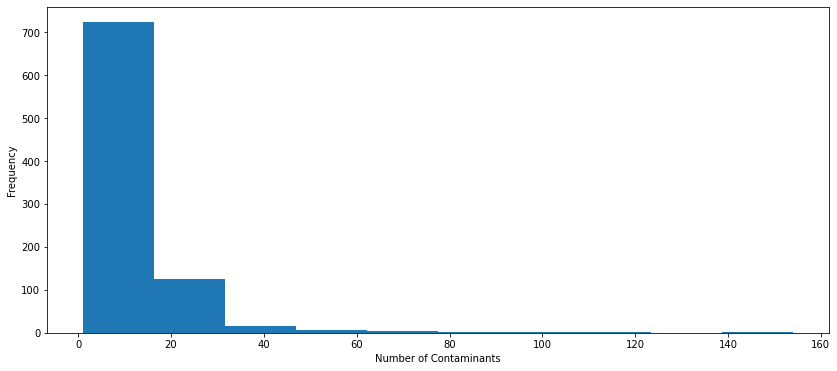

In [54]:
ax = df['Num_Contaminants'].plot(kind="hist", figsize=(14,6))
ax.set_xlabel('Number of Contaminants')


In [55]:
#correlation between columns

corr = df.corr()

corr

,county_FIPS,Total_Population,White,Black,Native,Asian,Pacific_Islander,Other,Two_or_more_Races,Hispanic,...,pct_Two_or_more_Races,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
county_FIPS,1.000000,-0.137708,-0.120551,-0.078160,-0.147666,-0.167912,-0.154098,-0.137707,-0.139836,-0.135369,...,-0.140885,-0.200934,-0.073451,-0.160558,-0.060728,-0.095463,-0.129516,-0.132403,-0.013008,0.003321
Total_Population,-0.137708,1.000000,0.962043,0.816269,0.941785,0.888672,0.708059,0.928859,0.976837,0.944738,...,0.386574,0.421483,0.419886,0.450484,0.396754,0.158437,0.483684,0.862992,0.093348,0.007088
White,-0.120551,0.962043,1.000000,0.797366,0.846009,0.798113,0.676447,0.813392,0.902305,0.838303,...,0.406069,0.449415,0.435422,0.488167,0.420275,0.153414,0.484716,0.820155,0.092988,0.010447
Black,-0.078160,0.816269,0.797366,1.000000,0.675337,0.577902,0.377562,0.653601,0.745674,0.688179,...,0.246833,0.390051,0.290547,0.385682,0.277202,0.204488,0.253759,0.612401,0.041288,-0.005031
Native,-0.147666,0.941785,0.846009,0.675337,1.000000,0.879355,0.716553,0.979551,0.969151,0.980857,...,0.390994,0.378638,0.404593,0.401137,0.374130,0.140032,0.513918,0.857740,0.099204,0.003976
Asian,-0.167912,0.888672,0.798113,0.577902,0.879355,1.000000,0.759504,0.877071,0.883716,0.871758,...,0.312045,0.344720,0.350994,0.368332,0.327308,0.128984,0.389509,0.788768,0.079978,0.009944
Pacific_Islander,-0.154098,0.708059,0.676447,0.377562,0.716553,0.759504,1.000000,0.686812,0.718411,0.687941,...,0.359855,0.342851,0.385988,0.382559,0.363837,0.071355,0.353634,0.623057,0.066556,0.006622
Other,-0.137707,0.928859,0.813392,0.653601,0.979551,0.877071,0.686812,1.000000,0.967148,0.995071,...,0.341608,0.316158,0.368769,0.341186,0.337922,0.116739,0.515117,0.855040,0.102666,0.006016
Two_or_more_Races,-0.139836,0.976837,0.902305,0.745674,0.969151,0.883716,0.718411,0.967148,1.000000,0.984749,...,0.404518,0.387174,0.426055,0.418354,0.396158,0.136092,0.492838,0.856006,0.094724,0.005078
Hispanic,-0.135369,0.944738,0.838303,0.688179,0.980857,0.871758,0.687941,0.995071,0.984749,1.000000,...,0.366514,0.336064,0.391320,0.363402,0.359457,0.120919,0.510531,0.852746,0.100521,0.005360


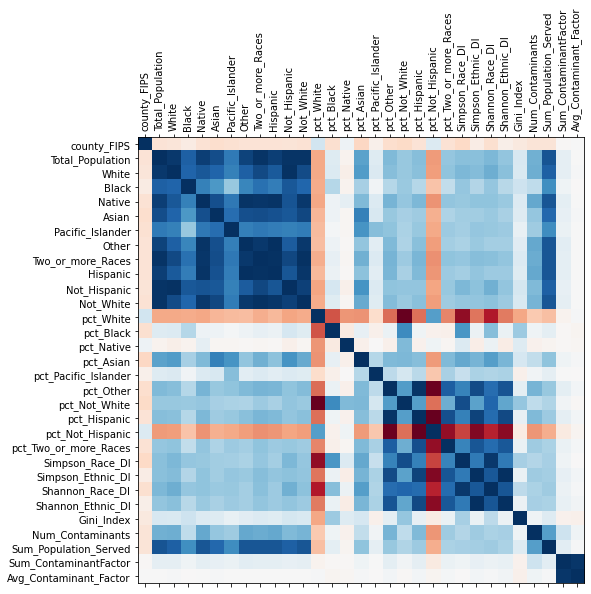

In [56]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap="RdBu", fignum = fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation="vertical");
plt.yticks(range(len(corr.columns)),corr.columns);

In [57]:
df.columns

Index(['county_FIPS', 'Geographic_Area_Name', 'County', 'GEOID',
       'Total_Population', 'White', 'Black', 'Native', 'Asian',
       'Pacific_Islander', 'Other', 'Two_or_more_Races', 'Hispanic',
       'Not_Hispanic', 'Not_White', 'pct_White', 'pct_Black', 'pct_Native',
       'pct_Asian', 'pct_Pacific_Islander', 'pct_Other', 'pct_Not_White',
       'pct_Hispanic', 'pct_Not_Hispanic', 'pct_Two_or_more_Races',
       'Simpson_Race_DI', 'Simpson_Ethnic_DI', 'Shannon_Race_DI',
       'Shannon_Ethnic_DI', 'Gini_Index', 'County_FIPS', 'Num_Contaminants',
       'Sum_Population_Served', 'Sum_ContaminantFactor',
       'Min_Contaminant_Factor', 'Max_Contaminant_Factor',
       'Avg_Contaminant_Factor'],
      dtype='object')

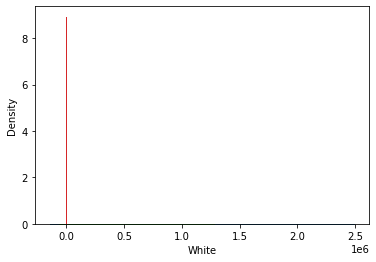

In [ ]:
for col_name in df.columns.values[6:10]:
    sns.kdeplot(data=df[col_name],shade=True)

<AxesSubplot:xlabel='%_Non-White', ylabel='Density'>

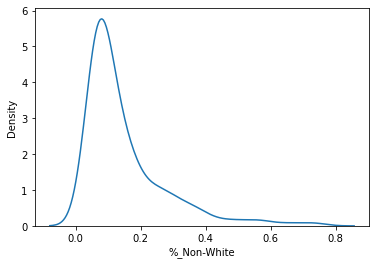

In [ ]:
sns.kdeplot(data=df['%_Non-White'])

In [ ]:
# filter DF on indices and contaminants
df_contaminants = df[['Total_Population','Simpson_Race_DI', 'Simpson_Ethnic_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index',
       'Num_Contaminants', 'Sum_ContaminantFactor', 'Min_Contaminant_Factor',
       'Max_Contaminant_Factor', 'Avg_Contaminant_Factor']]

In [ ]:
df_contaminants.head()

,Total_Population,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,58805,0.444747,0.069410,0.986667,0.155018,0.4552,6,551,27,148,91.83
1,231767,0.321154,0.103480,0.868861,0.212231,0.4566,9,1625,28,580,180.56
2,25223,0.572334,0.112569,1.164057,0.226599,0.5047,3,1414,138,1132,471.33
3,22293,0.407736,0.064188,0.879973,0.145676,0.4500,9,2538,17,1895,282.00
4,59134,0.258546,0.176138,0.808008,0.319759,0.4685,30,37191,18,5219,1239.70


In [ ]:
cor = df_contaminants.corr()
cor

,Total_Population,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
Total_Population,1.000000,0.430688,0.430067,0.476412,0.412193,0.178880,0.207129,0.018536,0.059597,0.001958,0.006027
Simpson_Race_DI,0.430688,1.000000,0.562652,0.957829,0.576324,0.384826,0.157842,-0.002538,-0.061892,-0.009635,-0.021658
Simpson_Ethnic_DI,0.430067,0.562652,1.000000,0.753054,0.993532,-0.004858,0.286729,0.067295,-0.041698,0.054611,0.045668
Shannon_Race_DI,0.476412,0.957829,0.753054,1.000000,0.770562,0.298432,0.225156,0.021311,-0.066436,0.010713,-0.000088
Shannon_Ethnic_DI,0.412193,0.576324,0.993532,0.770562,1.000000,-0.006164,0.293644,0.072275,-0.061478,0.059170,0.049808
Gini_Index,0.178880,0.384826,-0.004858,0.298432,-0.006164,1.000000,-0.031669,-0.078879,0.074488,-0.076667,-0.078765
Num_Contaminants,0.207129,0.157842,0.286729,0.225156,0.293644,-0.031669,1.000000,0.146427,-0.276357,0.096307,0.069256
Sum_ContaminantFactor,0.018536,-0.002538,0.067295,0.021311,0.072275,-0.078879,0.146427,1.000000,-0.026093,0.997464,0.991249
Min_Contaminant_Factor,0.059597,-0.061892,-0.041698,-0.066436,-0.061478,0.074488,-0.276357,-0.026093,1.000000,-0.030918,0.055764
Max_Contaminant_Factor,0.001958,-0.009635,0.054611,0.010713,0.059170,-0.076667,0.096307,0.997464,-0.030918,1.000000,0.990713


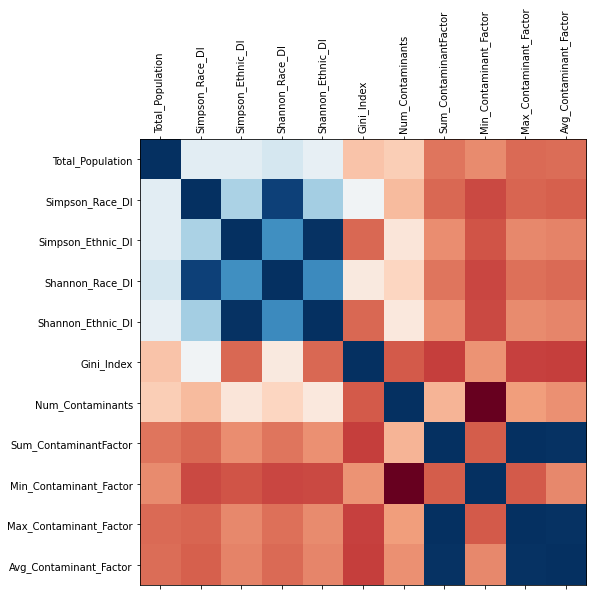

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(cor,cmap="RdBu", fignum = fig.number)
plt.xticks(range(len(cor.columns)),cor.columns,rotation="vertical");
plt.yticks(range(len(cor.columns)),cor.columns);

In [59]:
df

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,8069,"Larimer County, Colorado",Larimer County,0500000US08069,359066,295995,3816,2879,8539,326,...,0.948124,0.375569,0.4428,8069,4,264021,4744,984,1519,1186.00
1,10001,"Kent County, Delaware",Kent County,0500000US10001,181851,107685,46999,1150,4430,126,...,1.305087,0.271086,0.4191,10001,9,70580,4987,201,1395,554.11
2,10003,"New Castle County, Delaware",New Castle County,0500000US10003,570719,314231,146545,2157,35201,176,...,1.464587,0.349206,0.4607,10003,20,555453,15583,68,4732,779.15
3,10005,"Sussex County, Delaware",Sussex County,0500000US10005,237378,175847,25358,1844,3071,113,...,1.161943,0.352475,0.4561,10005,11,205901,5456,91,1295,496.00
4,16019,"Bonneville County, Idaho",Bonneville County,0500000US16019,123964,103736,627,1262,1424,155,...,0.919484,0.401124,0.4287,16019,1,2982,42,42,42,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,6087,"Santa Cruz County, California",Santa Cruz County,0500000US06087,270861,160565,3151,3608,12554,385,...,1.532958,0.646291,0.4728,6087,2,500,1188,377,811,594.00
878,6095,"Solano County, California",Solano County,0500000US06095,453491,175768,62158,5389,72767,4163,...,1.949749,0.595389,0.4147,6095,1,100147,1104,1104,1104,1104.00
879,6097,"Sonoma County, California",Sonoma County,0500000US06097,488863,306684,7616,8856,22846,1841,...,1.510993,0.601542,0.4512,6097,1,495,20,20,20,20.00
880,6107,"Tulare County, California",Tulare County,0500000US06107,473117,186255,6669,10646,17195,724,...,1.597896,0.644292,0.4602,6107,84,238210,58802,0,97,700.02
